In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For getting the colour map
import matplotlib.cm as cm

#For clustering and creating dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# For labels of the dendogram plot
import pylab

# for scatter matrix of numerical variables
from pandas.plotting import scatter_matrix

#Import for running a t test
from scipy.stats import ttest_ind

#Import stats models for Logistic Regression for stastical Inference
import statsmodels.formula.api as smf

#Import DateTime to manipulate datetime columns
import datetime

# README
## This Exploratory Data Analysis Assignment is done in three sections.
### Section 1:
In this section is divided into the following subsections. We do the following for each column
#### Data Analysis 
percentiles, null values, outliers <br>
Data Distribution - histogram, bar chart. box chart.

#### Data Cleanup.
#### Data Insights
Univariate Analysis  <br>
Segmented univariate analysis <br>

t-test (To conclude after the advanced statistics course)

### Section 2:
Derived Variables.

### Section 3:
Correlation analysis, Bivariate Analysis, Logistic Regression Model



In [355]:
#Pandas is complaining about not being able to infer data types. 
#We will set the data types so that pandas is memory efficient while processing the columns. 
#reference: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
#todo. Set the datatypes of individual columns


# ----------------- Common Functions ------------------------

In [356]:
# Helper functions to do analysis of numeric variable.
def do_analysis(dataframe, column_name):
    print(dataframe[column_name].describe(percentiles=np.linspace(0,1,11)))
    print("Number of null values for the column {0} : {1}".format(column_name, dataframe[column_name].isnull().sum()))
    plt.figure(figsize=(10,10))
    plt.subplot(311)
    dataframe[column_name].plot(kind='hist', bins=50)
    plt.subplot(312)
    dataframe[column_name].plot(kind='box')
    dataframe[[column_name, 'loan_status']].boxplot(by='loan_status')


In [357]:
# Helper function to print the analysis of categorical variables
def do_analysis_categorical(dataframe, column_name):
    print(dataframe[column_name].value_counts())
    # Segmented Univariate Analysis
    pivot = pd.pivot_table(lending_club, values = 'policy_code',
                         index = [column_name], columns = ['loan_status'], aggfunc = np.sum, margins=True)
    print(pivot)
    # todo: find a way to find percentages in the pivot table
    #print(pivot[['Charged Off', 'Fully Paid']].div(pivot[[ 'All', 'All']]))
    # Segmented Univariate Analysis
    pd.pivot_table(lending_club, values = 'policy_code', index = [column_name],
               columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

In [358]:
# Helper function to run a t test between charged_off and fully paid population.
def run_t_test(dataframe, column_name):
    charged_off = dataframe.loc[dataframe['loan_status'] == 'Charged Off']
    fully_paid = dataframe.loc[dataframe['loan_status'] == 'Fully Paid']
    print(ttest_ind(charged_off[column_name], fully_paid[column_name]))
    

In [359]:
#All input dates are in MON-YY Format e.g: DEC-11
def changeDate2SequenceOfInt(inputDate):
    if(pd.isnull(inputDate)):
        return 0
    else:
        dt = datetime.datetime.strptime(inputDate,"%b-%y")
        return int(str(dt.year) + str(dt.strftime('%m')))

In [360]:
def checkNullPerForColumns(columnName):
    print ("Null Percentage of the Column is: ==> ", round(100*(lending_club_master.loc[:,columnName].isnull().sum()/len(lending_club_master.loc[:,columnName].index)), 2))

In [361]:
#Plot CountPlot and TotalAmount Plot Based on LoanAmount
def pltUniVariableAnalysis(column, df):
    plt.figure(figsize=(10,10))
 
    y = 'loan_amnt'
    hue = 'loan_status'
   
    plt.subplot(2,1,1)
    p = sns.barplot(x = column, y = y, hue=hue, data = df, estimator=np.sum)
    p.set_xticklabels(p.get_xticklabels(), rotation = 90)
    #plt.title(sumTitle)
    plt.subplot(2,1,2)
    q = sns.countplot(x = column, hue = hue, data = df)
    q.set_xticklabels(q.get_xticklabels(), rotation = 90)
    #plt.title(countTitle)
    plt.show()

In [362]:
def createDict(columnName, dataFrame):
    unique_columnValues = dataFrame.loc[:,columnName].unique()
    unique_Count = len(unique_columnValues)
    columnName_col2Val = dict(zip(unique_columnValues,np.arange(unique_Count)))
    columnName_val2Col = dict(zip(np.arange(unique_Count), unique_columnValues))
    return columnName_col2Val, columnName_val2Col

In [363]:
#Plot Categorical Based on Loan_Amount With Title as Parameter. Draw 2 Plots to Show the Comparision of Loan Status
def pltCategorical(columnName, title1, title2):
    X1 = lending_club.pivot_table(index=columnName, values = 'loan_amnt', columns='loan_status', aggfunc='sum').reset_index()
    plt.figure(figsize=(16,14))
    plt.subplot(2, 1, 1)
    p = sns.barplot(columnName, 'Charged Off', data = X1.sort_values(by = 'Charged Off', ascending = False))
    p.set_xticklabels(p.get_xticklabels(),rotation=30)
    plt.title(title1)
    plt.subplot(2,1,2)
    q = sns.barplot(columnName, 'Fully Paid', data = X1.sort_values(by = 'Fully Paid', ascending = False))
    q.set_xticklabels(q.get_xticklabels(),rotation=30)
    plt.title(title2)
    plt.show()

In [364]:
#Create a DataFrame to Group LateFeePercent Based on Loan_Status
def createDF_LateFeePrecent_Categories(categoryColumn):
    X1 = lending_club.pivot_table(index = categoryColumn, values = 'lateFeePrecent', columns=['loan_status'], aggfunc='mean').reset_index()
    X1['LateFeePercent_diff'] = (X1['Charged Off'] - X1['Fully Paid'])
    X1 = X1.sort_values(by='LateFeePercent_diff', ascending = False)
    return X1

#Plot using Dataframe output from "createDF_LateFeePrecent_Categories" function
def pltLateFeePercentOnCategies(categoryColumn, dataFrame):
    plt.figure(figsize=(15,8))
    p = sns.barplot(x = categoryColumn,y='LateFeePercent_diff', data = dataFrame.sort_values(by='LateFeePercent_diff', ascending = False))
    plt.ylabel('Charged-Off LateFee Percent On Fully Paid')
    p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 12)
    plt.title("More LateFee Precent by ChargedOff Subscriber on FullyPaid Subscriber")

    plt.show() 

# ----------------- SECTION 1 ------------------------

## Data Analysis

### ==> Read Loan.csv file

In [365]:
lending_club = pd.read_csv('loan.csv')

C:\Users\Ranjan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### ==> Make default datatype as string for 47th Column avoid load error

In [366]:
print("Column Name Which Failed to Load ==> ", lending_club.columns[47])
customDataType = dict(zip(lending_club.columns,lending_club.dtypes)) #Get the Datatype
customDataType['next_pymnt_d'] = 'str'
lending_club = pd.read_csv('loan.csv',dtype=customDataType) #Reload

Column Name Which Failed to Load ==>  next_pymnt_d


### ==> Find all the Columns with 100% NULL and create a Dictionary

In [367]:
#Get Null% in each Column of loan dataframe
nullColumns = pd.DataFrame(round(100*(lending_club.isnull().sum()/len(lending_club.index)), 2), columns=['null%Column'])
#Create a Map Between Columns to Null% in DataFrame
dictColumn2NullPercent = dict(zip(nullColumns.index,nullColumns['null%Column']))

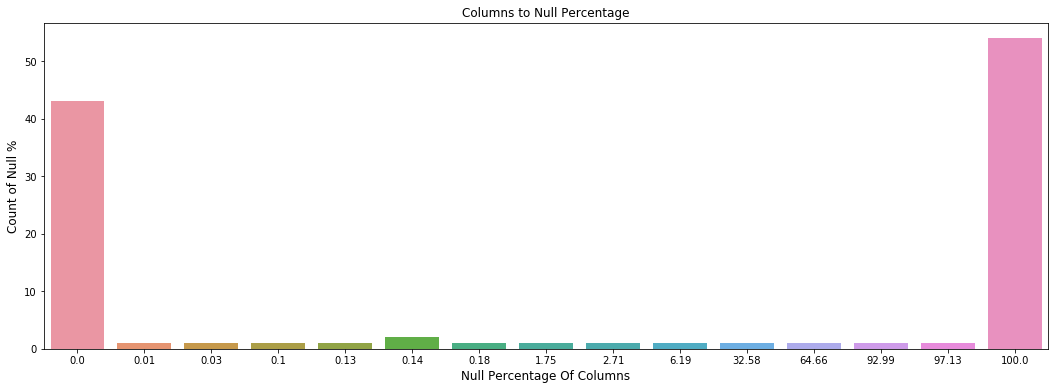

In [368]:
LendingClubCol_Df = pd.DataFrame(np.array(lending_club.columns), columns=['lending_club_columns'])
LendingClubCol_Df['NullPrecentage'] = LendingClubCol_Df['lending_club_columns'].apply(lambda x: dictColumn2NullPercent.get(x))
LendingClubCol_Df = LendingClubCol_Df.groupby('NullPrecentage').lending_club_columns.agg(['count']).sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(18,6))
p = sns.barplot(x = 'NullPrecentage', y = 'count', data = LendingClubCol_Df)
plt.xlabel('Null Percentage Of Columns', fontsize = 12)
plt.ylabel('Count of Null %', fontsize= 12)
plt.title('Columns to Null Percentage')
plt.show()

### ==> Remove all the columns from loan df having 100% Null values

In [369]:
#np Vectorized Function to Filter Null Columns from the Loan Dataframe
Func_filterNullCol = np.vectorize(lambda x: True if dictColumn2NullPercent.get(x) < 100 else False)
Func_filterNullCol(np.array(lending_club.columns))
#Drop All the Null COlumns
lending_club = lending_club.loc[:,Func_filterNullCol(np.array(lending_club.columns))]
lending_club.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### ==> Drop Columns with Single Unique Value as per Metadata Analysis

In [370]:
unncessaryColumns = ['desc', 'title', 'initial_list_status','application_type',
                     'acc_now_delinq', 'delinq_amnt', 'pymnt_plan', 'url', 'emp_title']
lending_club.drop(columns=unncessaryColumns, inplace=True)

## Basic Data Cleanup for All Columns

### ```==> loan_amnt, funded_amnt, funded_amnt_inv ```

In [371]:
#lending_club['loan_amnt'] = lending_club['loan_amnt'].apply(pd.to_numeric)
#lending_club['funded_amnt'] = lending_club['funded_amnt'].apply(pd.to_numeric)
#lending_club['funded_amnt_inv'] = lending_club['funded_amnt_inv'].apply(pd.to_numeric)
#lending_club['annual_inc'] = lending_club['annual_inc'].apply(pd.to_numeric)

### ```==> int_rate ```

In [372]:
lending_club['int_rate'] = round(lending_club['int_rate'].apply(lambda x: (str(x).split("%")[0])).apply(pd.to_numeric),0)

### ```==> installment ```

In [373]:
lending_club['installment'] = round(lending_club['installment'].apply(pd.to_numeric),0)

### ```==> emp_length ```

In [374]:
#Remove > and < Symbol and < 1 Value set to 0
lending_club['emp_length'] = lending_club['emp_length'].apply(lambda x: str(x).split("year")[0].\
                                                    strip().split("+")[0]).apply(lambda x: 0 if str(x).find("<") >=0 else x)

### ```==> home_ownership ```

In [375]:
# Only 3 Records in NONE Category with Full Paid, Hence same record is discarded
lending_club = lending_club[lending_club['home_ownership']  != 'NONE']

### ```==> issue_d, earliest_cr_line ```

In [376]:
lending_club['issue_d'] = lending_club['issue_d'].apply(changeDate2SequenceOfInt)
lending_club['earliest_cr_line'] = lending_club['earliest_cr_line'].apply(changeDate2SequenceOfInt)

### ```==> zip_code ```

In [377]:
lending_club['zip_code'] = lending_club['zip_code'].apply(lambda x: str(x)[0:3])

### ```==> revol_util ```    ```***``` NAN Value Normalization Need to Check

In [378]:
#Setting the default value 100%, Need to check futher 
lending_club.loc[(pd.isna(lending_club['revol_util'])), 'revol_util'] = 100.0
lending_club['revol_util'] = round(lending_club['revol_util'].apply(lambda x: (str(x).split("%")[0])).apply(pd.to_numeric),0)

### ```==> next_pymnt_d, last_pymnt_d, last_credit_pull_d ```

In [379]:
lending_club['next_pymnt_d'] = lending_club['next_pymnt_d'].apply(changeDate2SequenceOfInt)
lending_club['last_pymnt_d'] = lending_club['last_pymnt_d'].apply(changeDate2SequenceOfInt)
lending_club['last_credit_pull_d'] = lending_club['last_credit_pull_d'].apply(changeDate2SequenceOfInt)

==> Data Cleanup loan_status <br>
Since the Current loan statuses cannot be used to determine whether a loan is paid or charged off, <br>
We will remove the loan_status with the value Current. We will save it in a separate dataframe for future analysis

In [380]:
lending_club_master = lending_club
lending_club_current = lending_club.loc[lending_club['loan_status'] == 'Current']
lending_club = lending_club.loc[lending_club['loan_status'] != 'Current']
lending_club_ChargedOff = lending_club.loc[lending_club['loan_status'] == 'Charged Off']

# Data Analysis for loan_amnt

count    38574.000000
mean     11047.449059
std       7348.517888
min        500.000000
0%         500.000000
10%       3100.000000
20%       5000.000000
30.0%     6000.000000
40%       7750.000000
50%       9600.000000
60.0%    11200.000000
70%      14000.000000
80%      16000.000000
90%      21600.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Number of null values for the column loan_amnt : 0


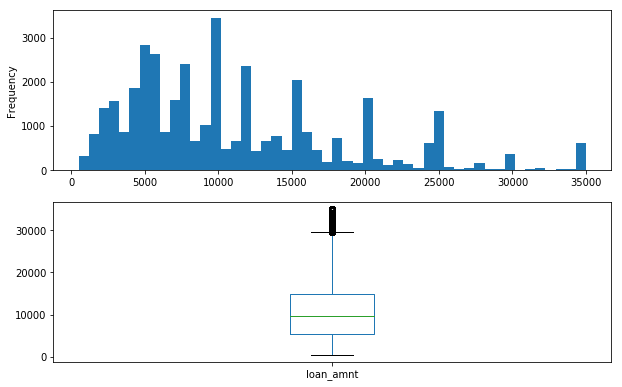

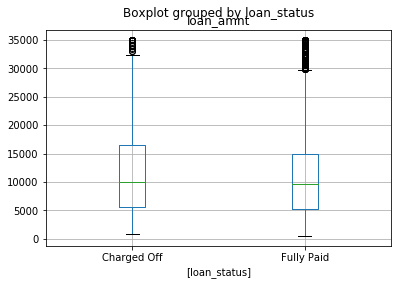

In [381]:
do_analysis(lending_club, 'loan_amnt')

## Insight.
The loan amount has spikes at the round numbers like 5, 000$, 10,000 $, 15, 000$, 20, 000$ 25, 000 $ etc. <br/>
This can be an input to the UX team or the Business Development team to create loan packages at these round numbers.

In [382]:
run_t_test(lending_club, 'loan_amnt')

Ttest_indResult(statistic=11.694718423883753, pvalue=1.533449120688028e-31)


## Insight.
Visually, there seems to be a slightdifference in the means of the loan amount for charged off and fully paid. <br/>
However, T Test indicates that loan amount has a bearing on the loan defaults

# Data Cleanup for loan_amnt

## Data Cleanup:  We will not remove any row for loan_amnt as all the rows seem valid.

# Insights for loan_amnt

In [383]:
lending_club[['annual_inc', 'loan_amnt']].corr()

,annual_inc,loan_amnt
annual_inc,1.000000,0.269045
loan_amnt,0.269045,1.000000


## Insight 
The Loan amount is corelated positively with the annual income

# Data Analysis for funded_amnt

In [384]:
# Is funded_amnt same as loan amnt. 
#What % of rows where funded amount and loan amount are not same.
percent_difference = lending_club.loc[lending_club['loan_amnt'] != lending_club['funded_amnt']]['funded_amnt'].shape[0]/ lending_club.shape[0]
print("% .2f" % (percent_difference * 100))

 4.55


In [385]:
# Is the monetary difference more. yes
(lending_club['loan_amnt'] - lending_club['funded_amnt']).sum()

10144475

count    38574.000000
mean     10784.461684
std       7090.379936
min        500.000000
0%         500.000000
10%       3000.000000
20%       5000.000000
30.0%     6000.000000
40%       7500.000000
50%       9550.000000
60.0%    10875.000000
70%      13000.000000
80%      16000.000000
90%      20000.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
Number of null values for the column funded_amnt : 0


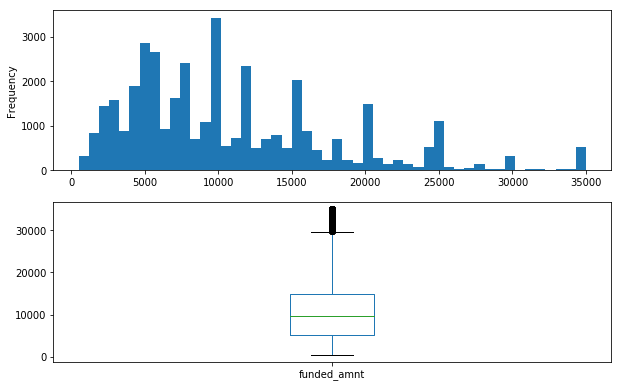

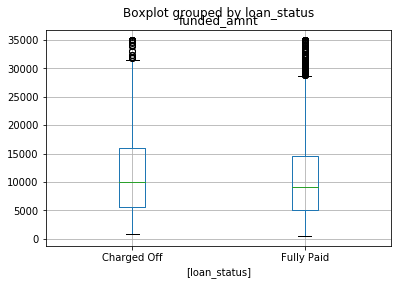

In [386]:
do_analysis(lending_club, 'funded_amnt')

# Insight
Charged off has a higher average funded amount than the fully paid segment <br>
Also, since the loan_amount and funded_amount are highly corelated, and there is not a lot a difference, we can just use the funded_amount column and drop the loan amount column.

# Data Cleanup for funded_amnt

# Insights for funded_amnt

In [387]:
# corelation between loan amount and funded amount
lending_club[['loan_amnt', 'funded_amnt']].corr()

,loan_amnt,funded_amnt
loan_amnt,1.000000,0.981789
funded_amnt,0.981789,1.000000


# Data Analysis for funded_amnt_inv

count    38574.000000
mean     10223.152285
std       7022.580869
min          0.000000
0%           0.000000
10%       2827.665000
20%       4375.162000
30.0%     5600.000000
40%       7000.000000
50%       8736.649151
60.0%    10000.000000
70%      12150.000000
80%      15000.000000
90%      19975.000000
100%     35000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
Number of null values for the column funded_amnt_inv : 0


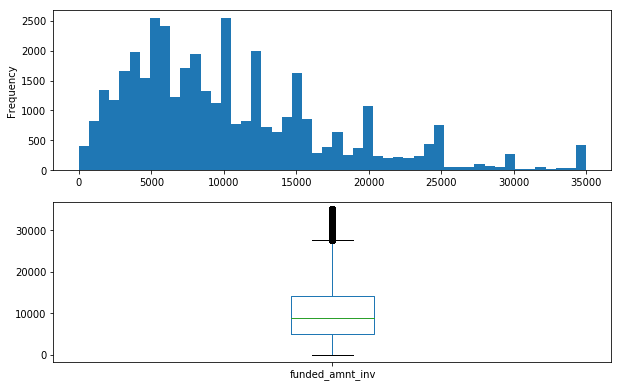

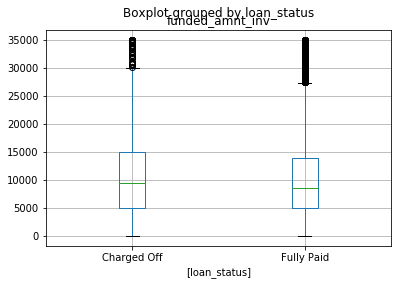

In [388]:
do_analysis(lending_club, 'funded_amnt_inv')

# Data Cleanup for funded_amnt_inv

# Insights for funded_amnt_inv

# Data Analysis for term

In [389]:
lending_club['term'].value_counts()

 36 months    29093
 60 months     9481
Name: term, dtype: int64

 36 months    29093
 60 months     9481
Name: term, dtype: int64
loan_status  Charged Off  Fully Paid    All
term                                       
 36 months          3227       25866  29093
 60 months          2400        7081   9481
All                 5627       32947  38574


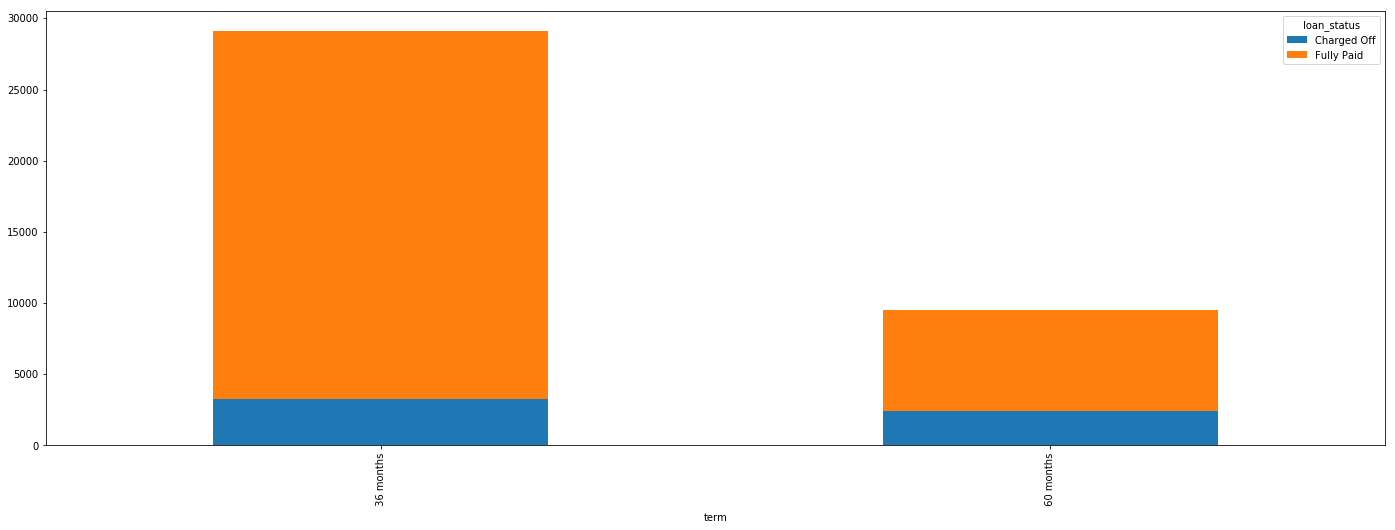

In [390]:
do_analysis_categorical(lending_club, 'term')

## Insight : term
11% of customers with tenure of 36 months default <br>
25.42 % of the customers with tenure of 60 months default <br>
Higher tenure leads to higher default rates.

# Data Cleanup for term

# Insights for term

# Data Analysis for int_rate

# Data Cleanup for int_rate

# Insights for int_rate

# Data Analysis for installment

# Data Cleanup for installment

# Insights for installment

# Data Analysis for grade

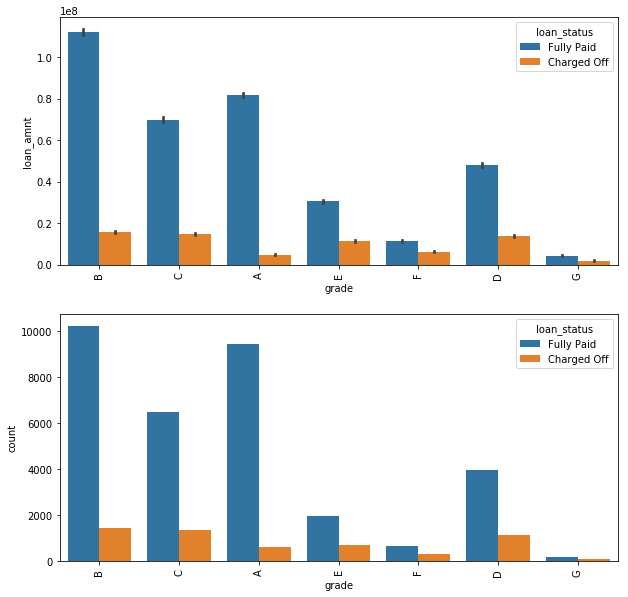

In [391]:
pltUniVariableAnalysis('grade',lending_club)

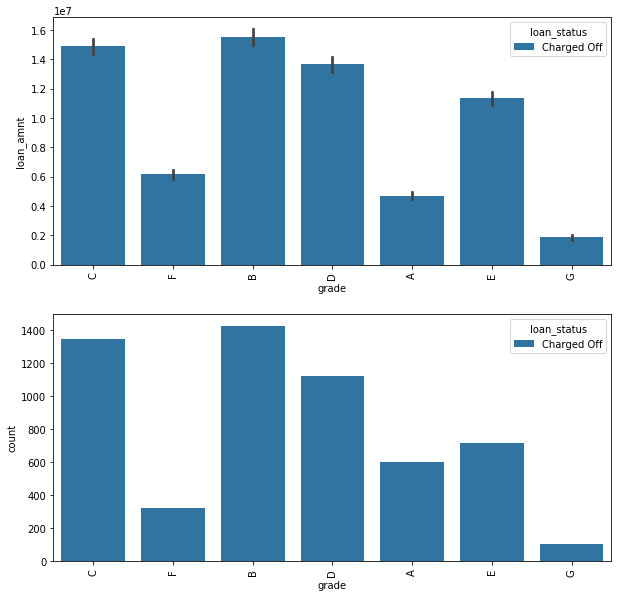

In [392]:
pltUniVariableAnalysis('grade',lending_club_ChargedOff)

# Data Cleanup for grade

# Insights for grade

* Maximum Loan Provided to A, B, C and D Group Subscriber
* Maximum loan provided to B,C and D Group "Charged Off" subscriber 

# Data Analysis for sub_grade

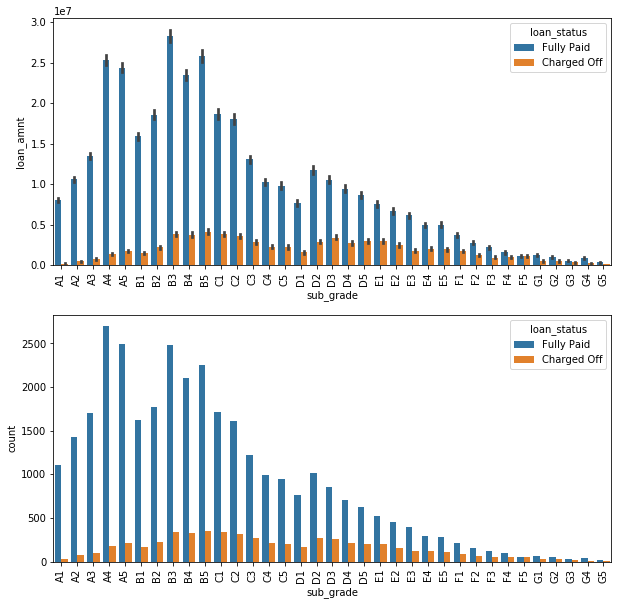

In [393]:
pltUniVariableAnalysis('sub_grade', lending_club.sort_values(by='sub_grade'))

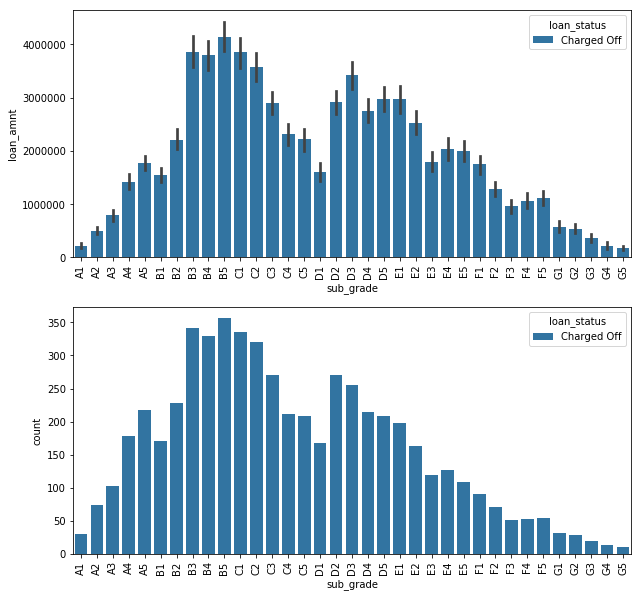

In [394]:
pltUniVariableAnalysis('sub_grade', lending_club_ChargedOff.sort_values(by='sub_grade'))

# Data Cleanup for sub_grade

# Insights for sub_grade

* Most of the Loans are Given in Upper Sub-Grades

# Data Analysis for emp_title

# Data Cleanup for emp_title

# Insights for emp_title

# Data Analysis for emp_length

# Data Cleanup for emp_length

# Insights for emp_length

# Data Analysis for home_ownership

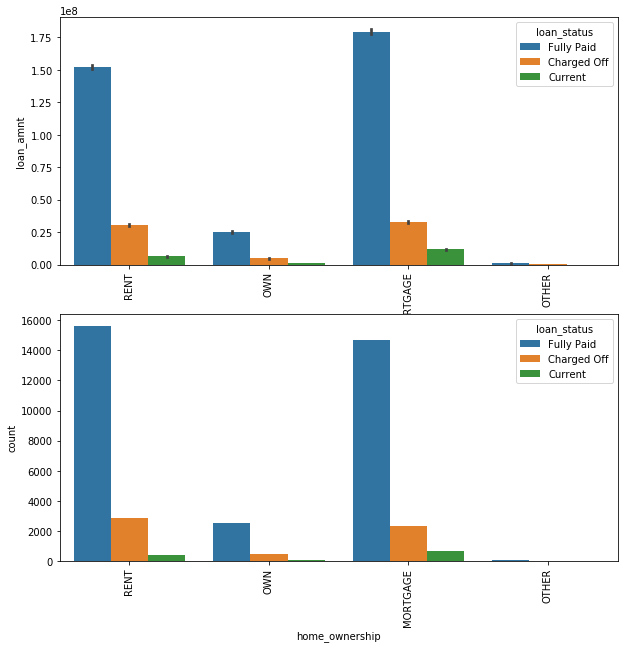

In [395]:
pltUniVariableAnalysis('home_ownership',lending_club_master)

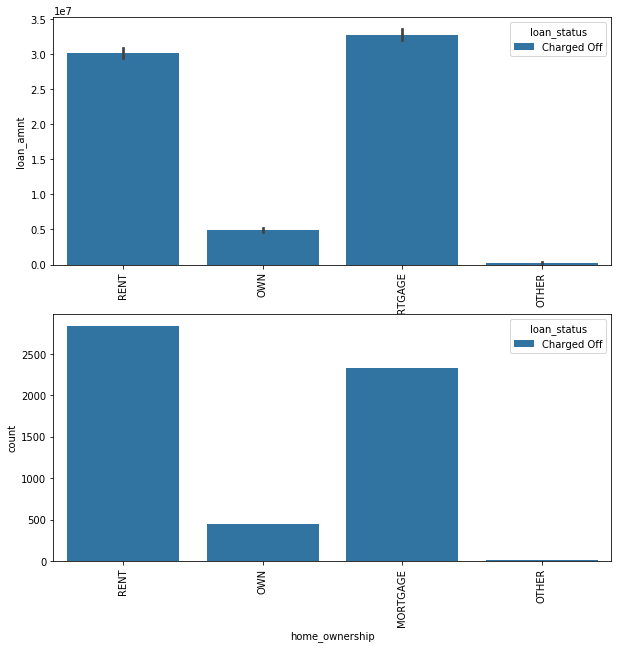

In [396]:
pltUniVariableAnalysis('home_ownership', lending_club_ChargedOff)

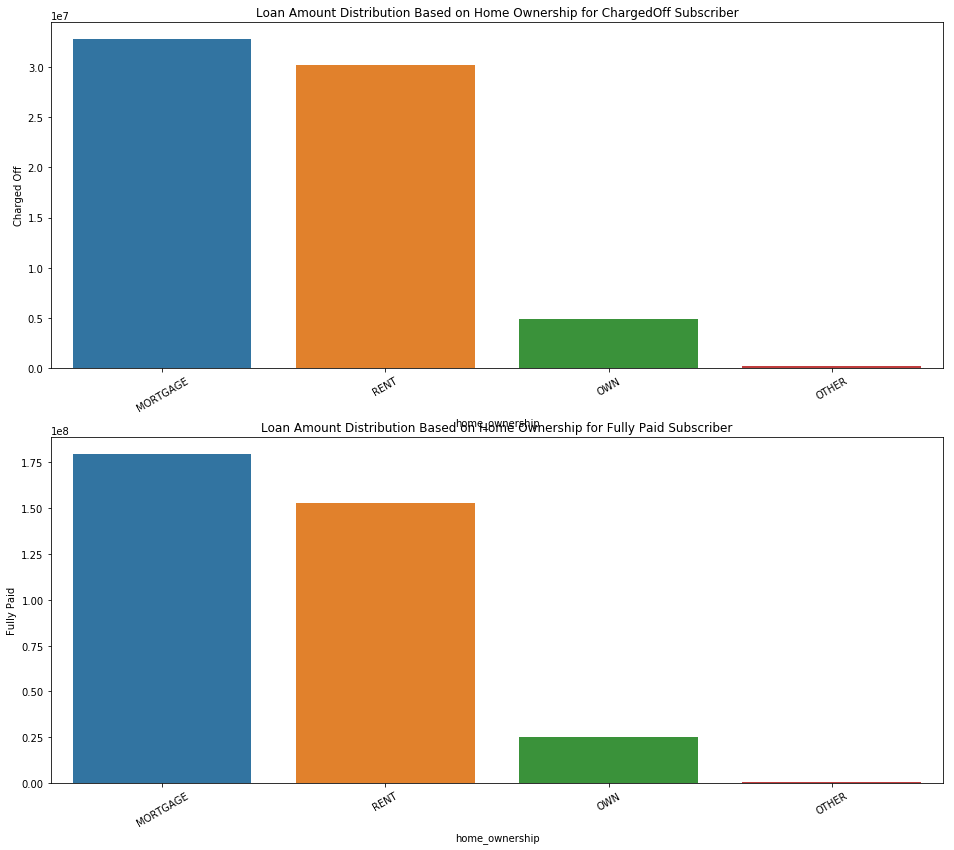

In [397]:
columnName = 'home_ownership'
title1 = 'Loan Amount Distribution Based on Home Ownership for ChargedOff Subscriber'
title2 = 'Loan Amount Distribution Based on Home Ownership for Fully Paid Subscriber'
pltCategorical(columnName, title1, title2)

# Data Cleanup for home_ownership

# Insights for home_ownership

* Most of the Defaulter Home Ownership status is "Mortgage" and "Rent".

# Data Analysis for annual_inc

count    3.857400e+04
mean     6.877704e+04
std      6.422001e+04
min      4.000000e+03
0%       4.000000e+03
10%      3.000000e+04
20%      3.719808e+04
30.0%    4.450000e+04
40%      5.000400e+04
50%      5.886028e+04
60.0%    6.500400e+04
70%      7.500000e+04
80%      9.000000e+04
90%      1.150000e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64
Number of null values for the column annual_inc : 0


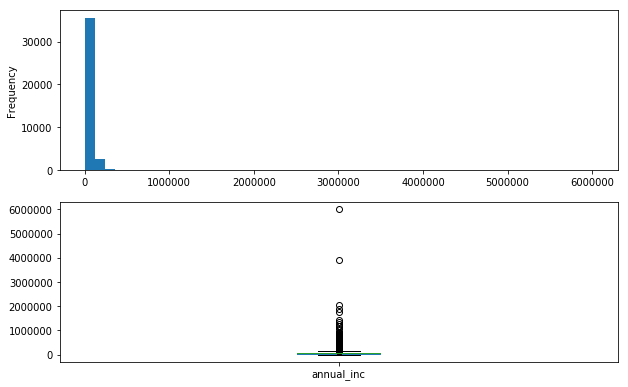

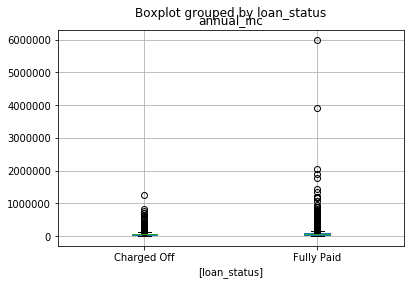

In [398]:
do_analysis(lending_club, 'annual_inc')

# Data Cleanup for annual_inc

In [399]:
# 5th percentile
lending_club.annual_inc.quantile(0.05)

24000.0

In [400]:
#What percent of values fall below the 5th percentile?
percent = lending_club.loc[lending_club['annual_inc'] < 24000].shape[0] * 100 / lending_club.shape[0]
print("% .2f" % percent)

 4.62


In [401]:
# 95th percentile
lending_club.annual_inc.quantile(0.99)

234161.99999999808

In [402]:
# Percentage of values that fall in above the 99th percentile (i.e top 1 percentile)
percent = lending_club.loc[lending_club['annual_inc'] > 234999].shape[0] * 100/ lending_club.shape[0]
print("% .2f" % percent)

 1.00


In [403]:
lending_club['annual_inc'].describe()

count    3.857400e+04
mean     6.877704e+04
std      6.422001e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886028e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The spread is between around 40,000 and 82,300. We will drop the outliers top 99 percentile. We will not remove the bottom 5 percentile because the lenders can be from the low income group. Also below the 5th percentile, there are 5% of rows. so we will not remove the bottom 5th percentile.

In [404]:
# Removing the top 1 percentile of outliers
lending_club = lending_club.loc[lending_club['annual_inc'] < 234999]

# Insights for annual_inc

# Data Analysis for verification_status

# Data Cleanup for verification_status

# Insights for verification_status

# Data Analysis for issue_d

# Data Cleanup for issue_d

# Insights for issue_d

# Data Analysis for loan_status

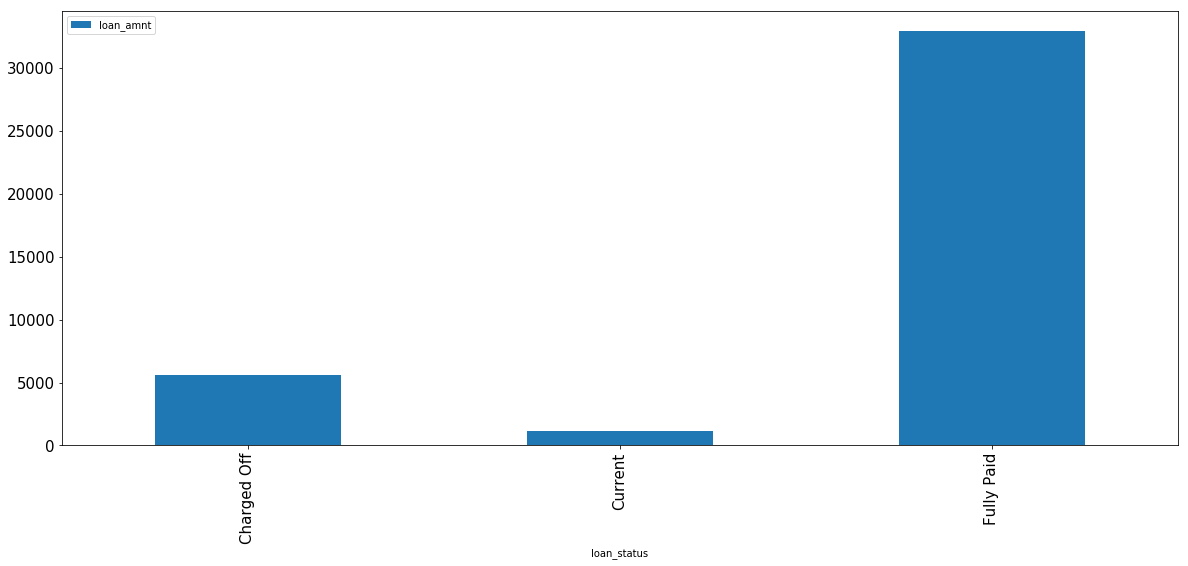

In [405]:
lending_club_master.pivot_table(values='loan_amnt', index='loan_status', aggfunc='count').plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)


# Data Cleanup for loan_status

# Insights for loan_status

* Number of Defaulters are Comparatively more than the susbcriber for which running. Fully Paid Loan subscriber Count is Higest

# Data Analysis for url

# Data Cleanup for url

# Insights for url

# Data Analysis for desc

# Data Cleanup for desc

# Insights for desc

 # Data Analysis for purpose

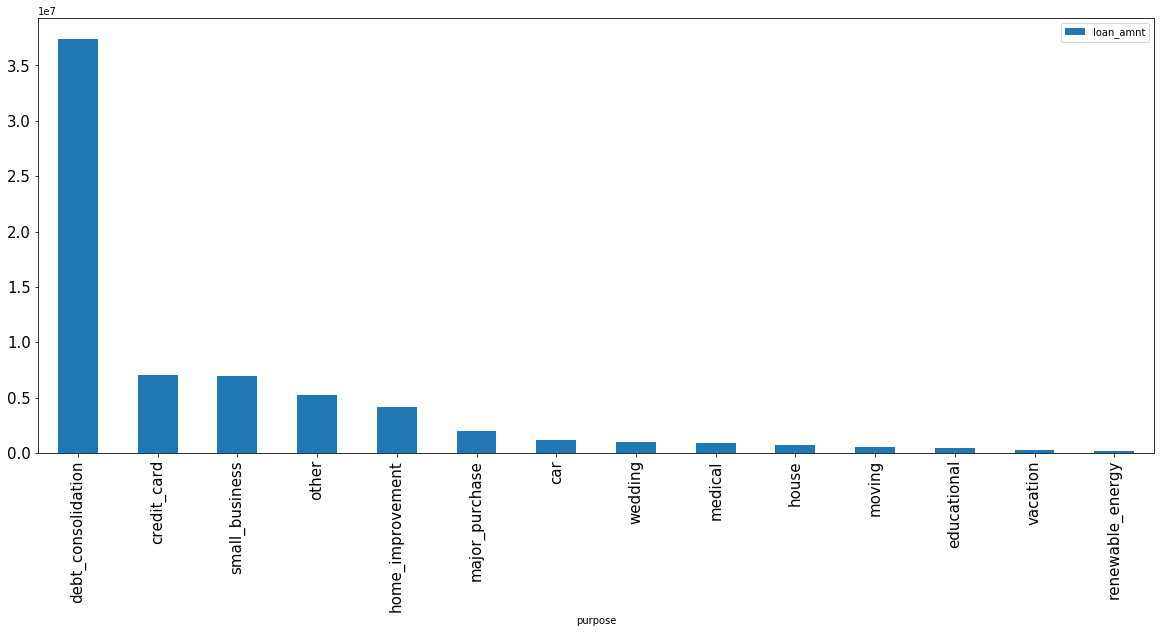

In [406]:
lending_club_ChargedOff.pivot_table(values='loan_amnt', index='purpose', aggfunc='sum').sort_values(by='loan_amnt', ascending=False).plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)

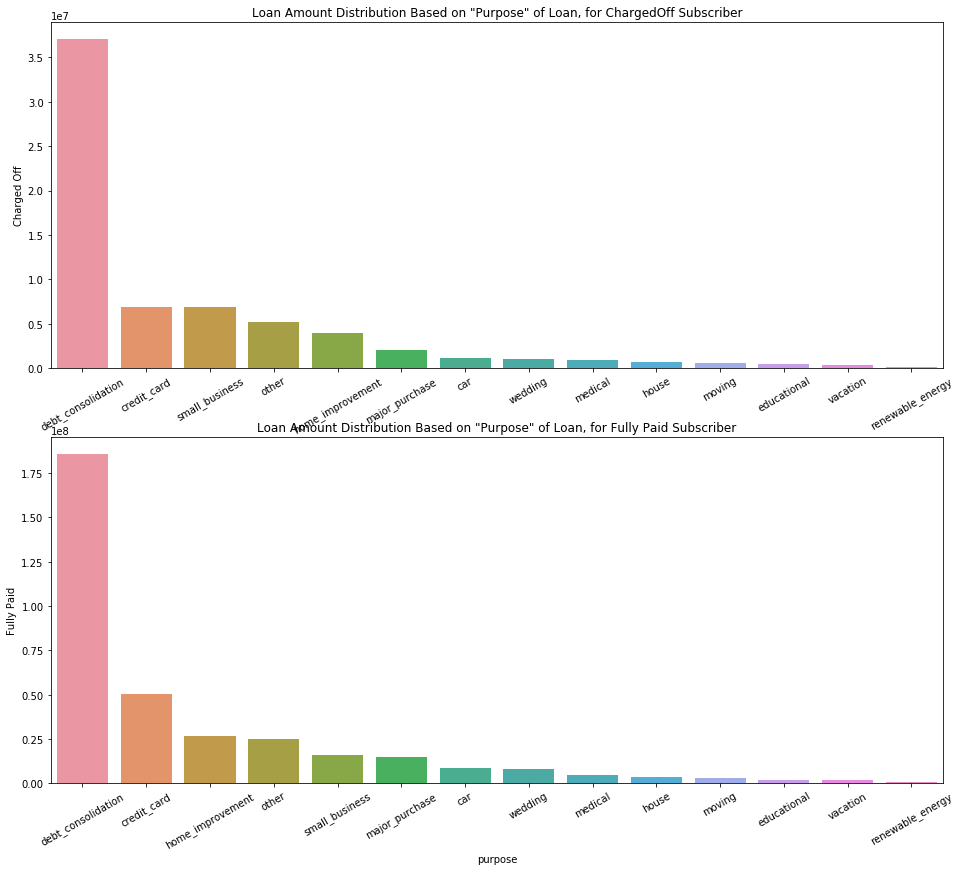

In [407]:
columnName = 'purpose'
title1 = 'Loan Amount Distribution Based on "Purpose" of Loan, for ChargedOff Subscriber'
title2 = 'Loan Amount Distribution Based on "Purpose" of Loan, for Fully Paid Subscriber'
pltCategorical(columnName, title1, title2)

# Data Cleanup for purpose

# Insights for purpose

* Major purpose of the loan (amount wise) for the defaulters are "Debt Consolidation", "Credit_card" and "Small Business" For ChargedOff Susbcriber
* For FullPaid Subscriber, 3rd most loan amount category is "Home Improvement"

# Data Analysis for title

# Data Cleanup for title

# Insights for title

# Data Analysis for zip_code

# Data Cleanup for zip_code

# Insights for zip_code

# Data Analysis for addr_state

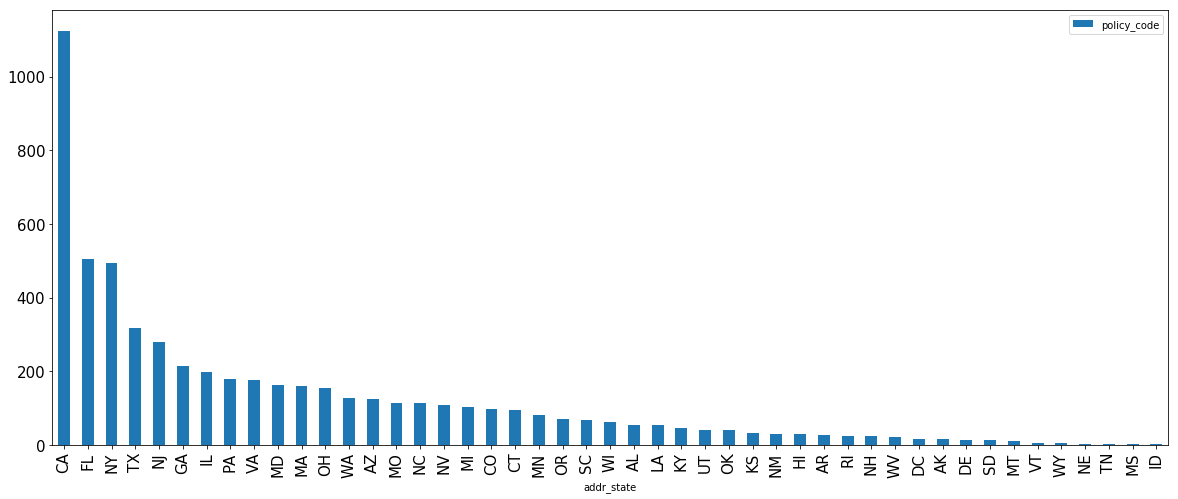

In [408]:
df1_addr_state = lending_club_ChargedOff.pivot_table(values='policy_code', index='addr_state', aggfunc='count').sort_values(by='policy_code', ascending=False)
df1_addr_state.plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)

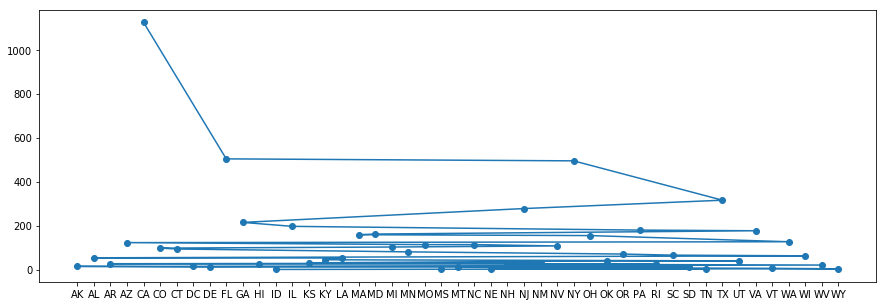

In [409]:
df1_addr_state = df1_addr_state.reset_index()
plt.figure(figsize=(15,5))
plt.plot(df1_addr_state.addr_state, df1_addr_state.policy_code, 'o-')
plt.show()

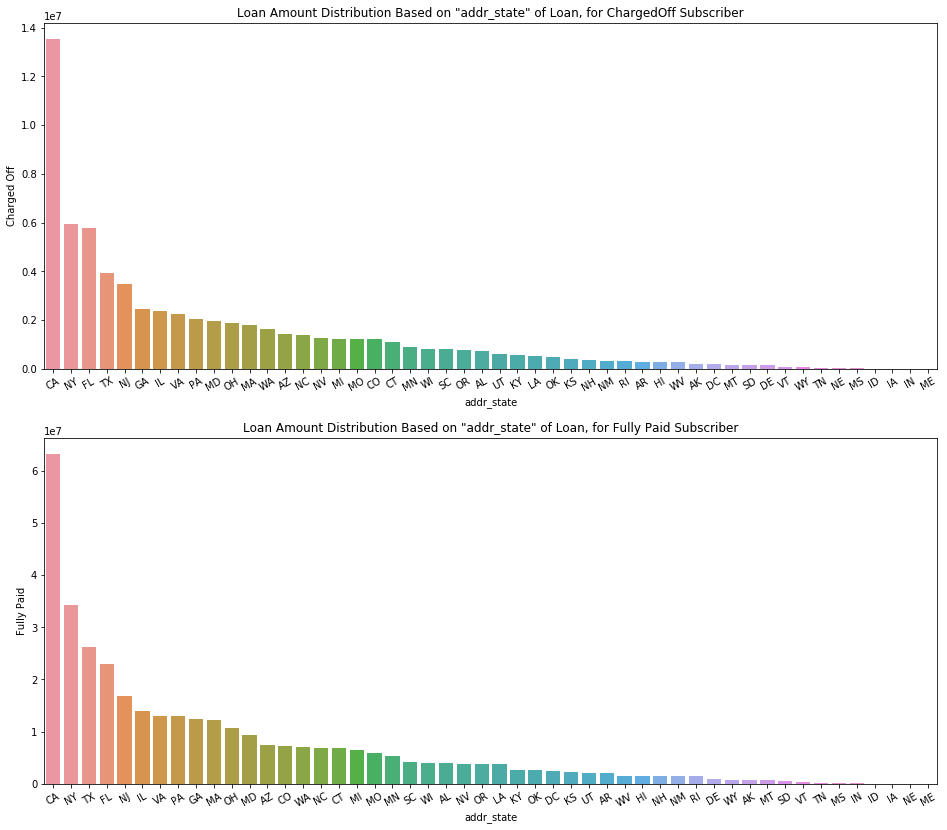

In [410]:
columnName = 'addr_state'
title1 = 'Loan Amount Distribution Based on "addr_state" of Loan, for ChargedOff Subscriber'
title2 = 'Loan Amount Distribution Based on "addr_state" of Loan, for Fully Paid Subscriber'
pltCategorical(columnName, title1, title2)

# Data Cleanup for addr_state

# Insights for addr_state

* Top States based on Loan_amount is different based on Loan_status
* Overal Top3 Categories are:
    * CA
    * FL
    * NY
* Fully Paid Category top3 are:
    * CA
    * NY
    * TX
* Charged Off Categories Top3 Are:
    * CA
    * NY
    * FL


# Data Analysis for dti

count    38190.000000
mean        13.333638
std          6.657797
min          0.000000
0%           0.000000
10%          4.130000
20%          7.020000
30.0%        9.330000
40%         11.420000
50%         13.430000
60.0%       15.380000
70%         17.490000
80%         19.750000
90%         22.310000
100%        29.990000
max         29.990000
Name: dti, dtype: float64
Number of null values for the column dti : 0


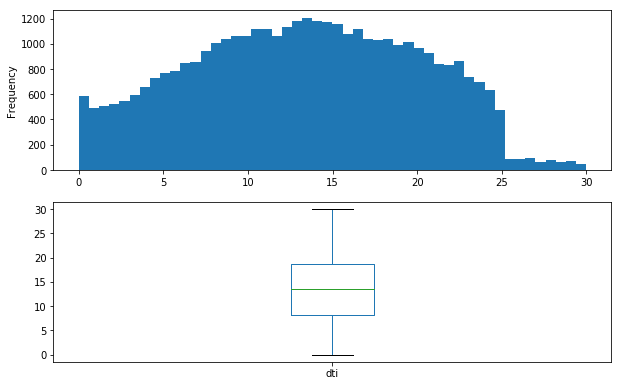

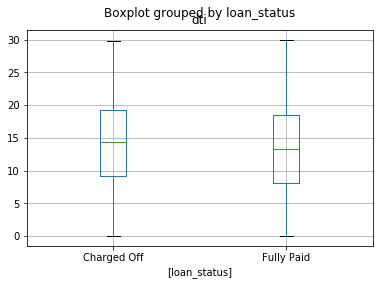

In [411]:
do_analysis(lending_club, 'dti')

# Data Cleanup for dti

### Since there are no null values, and no outliers for dti, there is no need to do a datacleanup

# Insights for dti

## Insight: The dti for charged off loans is higher than the fully paid loans

# Data Analysis for delinq_2yrs

# Data Cleanup for delinq_2yrs

# Insights for delinq_2yrs

# Data Analysis for earliest_cr_line

# Data Cleanup for earliest_cr_line

# Insights for earliest_cr_line

# Data Analysis for inq_last_6mths

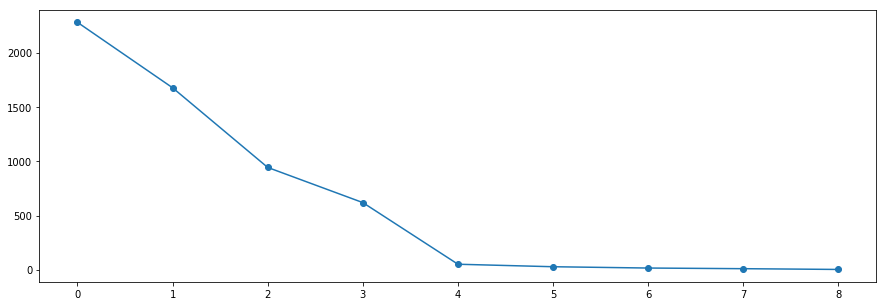

In [412]:
df1_inq_last_6mths = lending_club_ChargedOff.pivot_table(values='policy_code', index='inq_last_6mths', aggfunc='count').reset_index()
plt.figure(figsize=(15,5))
plt.plot(df1_inq_last_6mths.inq_last_6mths, df1_inq_last_6mths.policy_code, '-o')
plt.show()

# Data Cleanup for inq_last_6mths

# Insights for inq_last_6mths

* Number of Inquary Count is more from (0 to 4) in last 6 months period

# Data Analysis for mths_since_last_delinq

count    13515.000000
mean        35.935627
std         22.029297
min          0.000000
0%           0.000000
10%          8.000000
20%         15.000000
30.0%       21.000000
40%         27.000000
50%         34.000000
60.0%       40.000000
70%         47.000000
80%         57.000000
90%         69.000000
100%       120.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64
Number of null values for the column mths_since_last_delinq : 24675


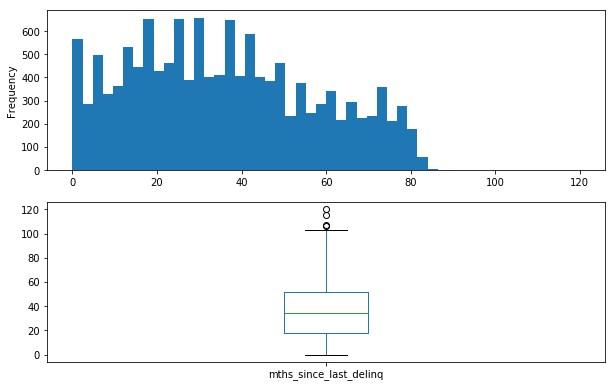

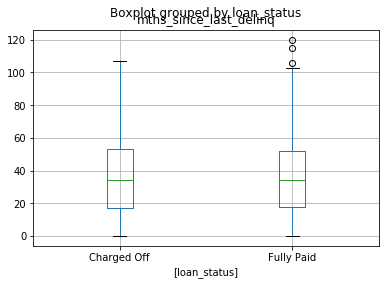

In [413]:
do_analysis(lending_club, 'mths_since_last_delinq')

# Data Cleanup for mths_since_last_delinq

In [414]:
# There are 24675 null values. The null values means that the customer has been repaying the loan on time.
# We will do this data cleanup by imputing these null values to 0.
lending_club.loc[lending_club['mths_since_last_delinq'].isnull(),'mths_since_last_delinq'] = 0

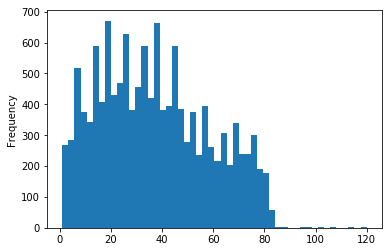

In [415]:
# Analysis of mths_since_last_delinq excluding the 0 values.
lending_club.loc[lending_club['mths_since_last_delinq'] != 0]['mths_since_last_delinq'].plot(kind='hist', bins=50)

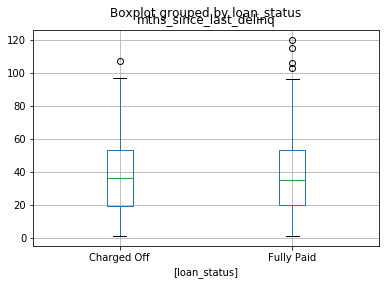

In [416]:
lending_club.loc[lending_club['mths_since_last_delinq'] != 0][['mths_since_last_delinq', 'loan_status']].boxplot(by='loan_status') 

# Insights for mths_since_last_delinq

### Charged off loans have a higher months since last delinquient

# Data Analysis for mths_since_last_record

# Data Cleanup for mths_since_last_record

# Insights for mths_since_last_record

# Data Analysis for open_acc

# Data Cleanup for open_acc

# Insights for open_acc

# Data Analysis for pub_rec

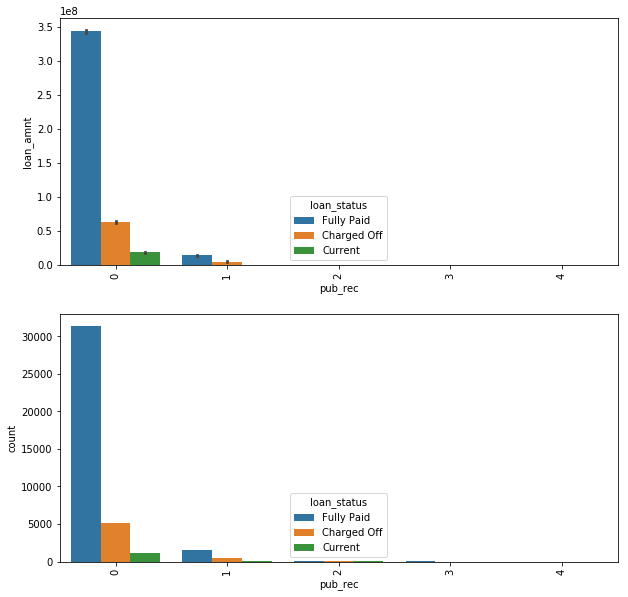

In [417]:
#lending_club_master.pivot_table(values='policy_code', index='pub_rec', aggfunc='count', columns=['loan_status']).plot(kind='bar', stacked=True, figsize=(20, 8), fontsize=15)
pltUniVariableAnalysis('pub_rec', lending_club_master)

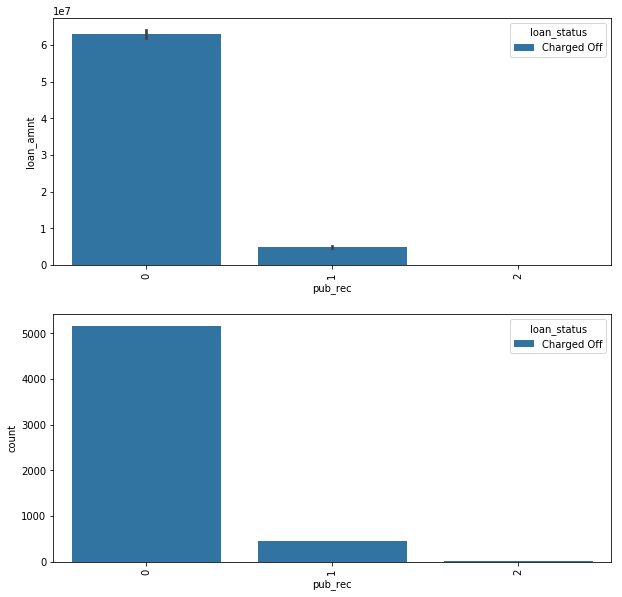

In [418]:
pltUniVariableAnalysis('pub_rec', lending_club_ChargedOff)

# Data Cleanup for pub_rec

# Insights for pub_rec

* Most of the applicant attitude was fine. Maximum are under 0 complain section. Defaulters are only in the category of no complain or 1 complain zone.

# Data Analysis for revol_bal

count     38190.000000
mean      13077.999869
std       15427.815017
min           0.000000
0%            0.000000
10%        1092.000000
20%        2770.800000
30.0%      4541.700000
40%        6487.000000
50%        8705.500000
60.0%     11316.000000
70%       14605.300000
80%       19397.800000
90%       28541.000000
100%     149588.000000
max      149588.000000
Name: revol_bal, dtype: float64
Number of null values for the column revol_bal : 0


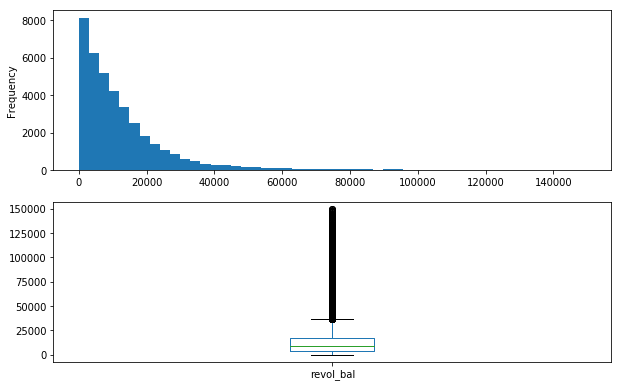

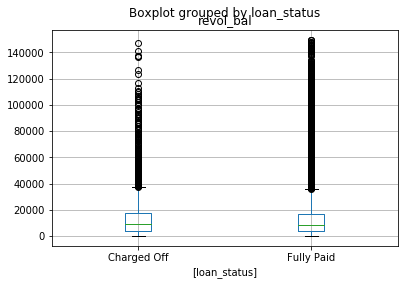

In [419]:
do_analysis(lending_club, 'revol_bal')

# Data Cleanup for revol_bal

In [420]:
# 90% of the revol_bal values are under 28, 541 dollars. The max loan amount is around 35, 000 dollars.
# It is likely that the values above 80, 000 are outliers, and we can remove them.
# Lets look at the percentage of rows where revol_bal is above 80,000
lending_club.loc[lending_club['revol_bal'] > 80000].shape[0] * 100 / lending_club.shape[0]

1.0002618486514794

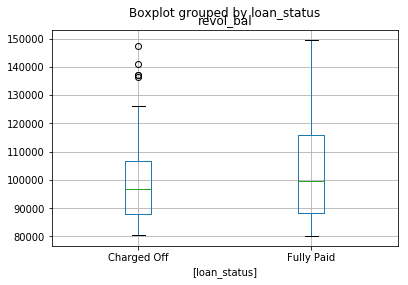

In [421]:
# To decide if we can drop these rows we will see if there is a major correlation between
# revol_bal and charged off for values over 60,000
lending_club.loc[lending_club['revol_bal'] > 80000][['revol_bal', 'loan_status']].boxplot(by='loan_status')

In [422]:
# Since there is a visible corelation between revolving balance and loan status, we cannot remove the values above 80,000
# The values above 80, 000 seem to be valid values.

In [423]:
lending_club[['revol_bal', 'loan_status']].groupby('loan_status').quantile([0.5])

,,revol_bal
loan_status,,
Charged Off,0.5,9176.5
Fully Paid,0.5,8631.5


# Insights for revol_bal

### The median revolving balance for charged off loans is 6.3% higher than the fully paid loans.

# Data Analysis for revol_util

# Data Cleanup for revol_util

# Insights for revol_util

# Data Analysis for total_acc

# Data Cleanup for total_acc

# Insights for total_acc

# Data Analysis for out_prncp

# Data Cleanup for out_prncp

# Insights for out_prncp

# Data Analysis for out_prncp_inv

# Data Cleanup for out_prncp_inv

# Insights for out_prncp_inv

# Data Analysis for total_pymnt

Total Number of Records:  39714
Total Unique Counts of the Records:  37847
count    38190.000000
mean     11767.212967
std       8696.546176
min          0.000000
0%           0.000000
10%       2903.992589
20%       4671.019472
30.0%     6093.307181
40%       7673.605898
50%       9614.195000
60.0%    11678.646520
70%      14243.160989
80%      17785.408670
90%      23882.842285
100%     58563.679930
max      58563.679930
Name: total_pymnt, dtype: float64
Number of null values for the column total_pymnt : 0


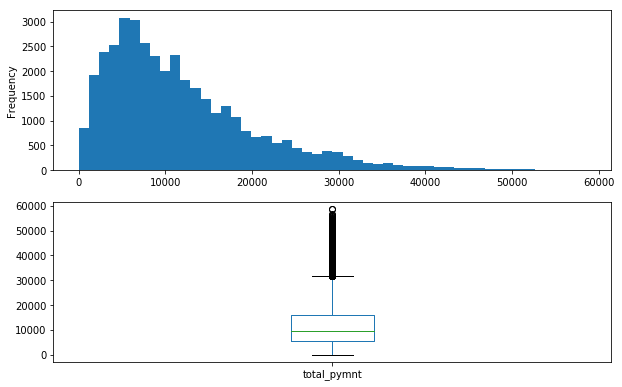

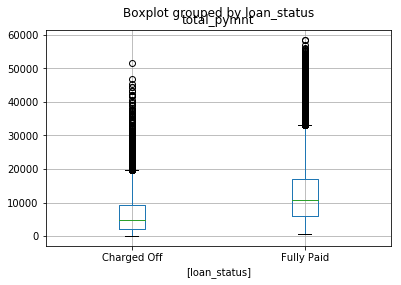

In [424]:
print("Total Number of Records: ", lending_club_master['total_pymnt'].shape[0])
print("Total Unique Counts of the Records: ", len(lending_club_master['total_pymnt'].unique()))
do_analysis(lending_club, 'total_pymnt')

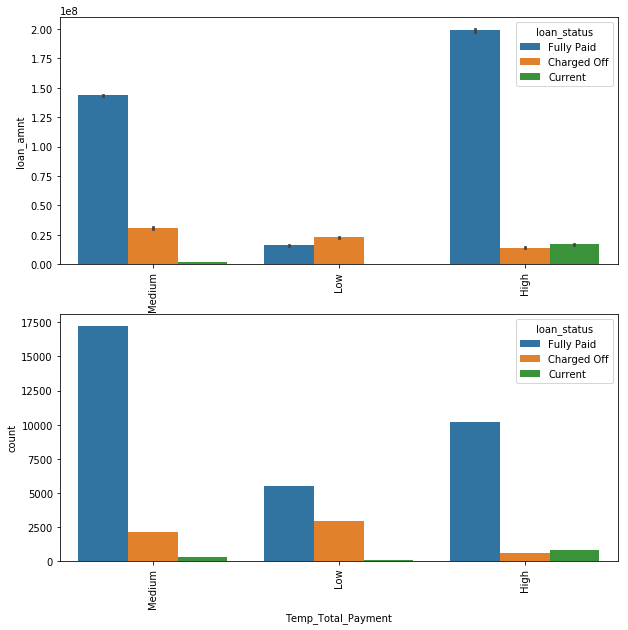

In [425]:
def splitTotalPayment(x):
    if x <= 5000:
        return "Low"
    elif x <= 15000:
        return "Medium"
    else:
        return "High"
lending_club_master['Temp_Total_Payment'] = lending_club_master['total_pymnt'].apply(splitTotalPayment)
pltUniVariableAnalysis('Temp_Total_Payment', lending_club_master)
lending_club_master.drop(columns='Temp_Total_Payment', inplace=True)

# Data Cleanup for total_pymnt

# Insights for total_pymnt

* Maximum total_payment within the Range of 5K to 15K
* Average Total Payment is more for Fully Paid Subscriber than ChargedOff Susbcriber.

# Data Analysis for total_pymnt_inv

# Data Cleanup for total_pymnt_inv

# Insights for total_pymnt_inv

# Data Analysis for total_rec_prncp

# Data Cleanup for total_rec_prncp

# Insights for total_rec_prncp

# Data Analysis for total_rec_int

# Data Cleanup for total_rec_int

# Insights for total_rec_int

# Data Analysis for total_rec_late_fee

In [426]:
checkNullPerForColumns('total_rec_late_fee')
totalChargedOffSub = lending_club_ChargedOff['total_rec_late_fee'].shape[0]
positiveLatePayment = len(lending_club_ChargedOff[lending_club_ChargedOff['total_rec_late_fee'] > 0])
print("Total Number of Subscriber Records: ==>", totalChargedOffSub)
print("Total Unique Counts of the Records: ==>", len(lending_club_ChargedOff['total_rec_late_fee'].unique()))
print("Total Number of +ve Late Payment, ChargedOff Subscriber: ==>",positiveLatePayment)
print("% of ChargedOff Subscriber Done Late Payment: ==>",  round((positiveLatePayment/totalChargedOffSub)*100, 0))
print(lending_club_master.groupby(['loan_status'])['total_rec_late_fee'].agg(['count', 'sum']))

Null Percentage of the Column is: ==>  0.0
Total Number of Subscriber Records: ==> 5627
Total Unique Counts of the Records: ==> 829
Total Number of +ve Late Payment, ChargedOff Subscriber: ==> 863
% of ChargedOff Subscriber Done Late Payment: ==> 15.0
             count           sum
loan_status                     
Charged Off   5627  24149.351283
Current       1140   1337.080719
Fully Paid   32947  28648.443189


# Data Cleanup for total_rec_late_fee

# Insights for total_rec_late_fee

* Maximum LatePayment count is under "FullyPaid" Section
* 15% of the ChargedOff Subscriber Does the Late Payment
* Not a direct impact to the ChargedOff Subscriber, Need to use this field along with other Money Related Fields.

# Data Analysis for recoveries

count    38190.000000
mean        97.606055
std        695.965913
min          0.000000
0%           0.000000
10%          0.000000
20%          0.000000
30.0%        0.000000
40%          0.000000
50%          0.000000
60.0%        0.000000
70%          0.000000
80%          0.000000
90%         16.383000
100%     29623.350000
max      29623.350000
Name: recoveries, dtype: float64
Number of null values for the column recoveries : 0


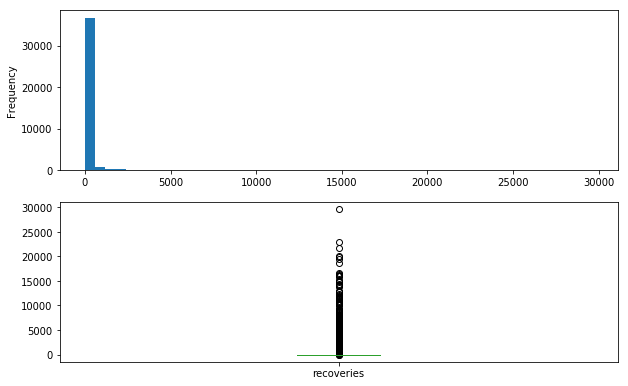

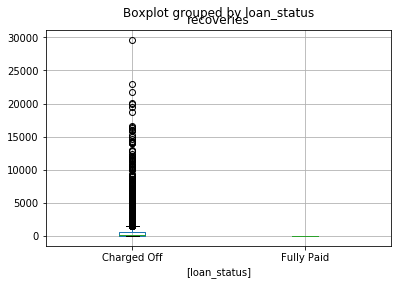

In [427]:
do_analysis(lending_club, 'recoveries')

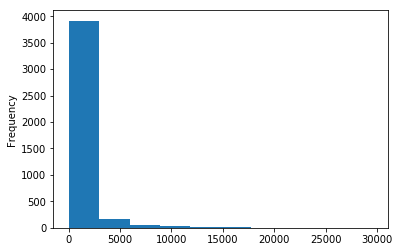

In [428]:
# Recovery is non zero for only charged off loans. So we will analyse recovery for Charged Off loans
lending_club.loc[lending_club['recoveries'] > 0]['recoveries'].plot(kind='hist')

# Data Cleanup for recoveries

In [429]:
# There are no null values for recoveries. Therefore there is no need for data cleanup.
# Recoveries is 0 for fully paid loans

# Insights for recoveries

In [ ]:
lending_club[['recoveries', 'loan_status']].groupby('loan_status').quantile([.5])

,,recoveries
loan_status,,
Charged Off,0.5,172.965
Fully Paid,0.5,0.000


### Recoveries are 0 for Fully Paid and median recovery is 172 for charged off loans
### Since Recovery happens after the loan defaults, this cannot be an independant variable when it comes to loan status

# Data Analysis for collection_recovery_fee

# Data Cleanup for collection_recovery_fee

# Insights for collection_recovery_fee

# Data Analysis for last_pymnt_d

# Data Cleanup for last_pymnt_d

# Insights for last_pymnt_d

# Data Analysis for last_pymnt_amnt

In [ ]:
checkNullPerForColumns('last_pymnt_amnt')
totalChargedOffSub = lending_club_ChargedOff['last_pymnt_amnt'].shape[0]
positiveLastPaymnt = len(lending_club_ChargedOff[lending_club_ChargedOff['last_pymnt_amnt'] > 0])
print("Total Number of Subscriber Records: ==>", totalChargedOffSub)
print("Total Unique Counts of the Records: ==>", len(lending_club_ChargedOff['last_pymnt_amnt'].unique()))
print("Total Number of +ve Late Payment, ChargedOff Subscriber: ==>",positiveLastPaymnt)

do_analysis(lending_club_ChargedOff, 'last_pymnt_amnt')

Null Percentage of the Column is: ==>  0.0
Total Number of Subscriber Records: ==> 5627
Total Unique Counts of the Records: ==> 4591
Total Number of +ve Late Payment, ChargedOff Subscriber: ==> 5556
count     5627.000000
mean       326.020833
std        528.983051
min          0.000000
0%           0.000000
10%         43.960000
20%         91.928000
30.0%      138.020000
40%        186.004000
50%        238.250000
60.0%      300.636000
70%        367.050000
80%        471.584000
90%        648.600000
100%     12818.380000
max      12818.380000
Name: last_pymnt_amnt, dtype: float64
Number of null values for the column last_pymnt_amnt : 0


In [ ]:
def splitLatePayment(x):
    if x <= 5000:
        return "Low"
    elif x <= 15000:
        return "Medium"
    else:
        return "High"
lending_club_master['Temp_Total_Payment'] = lending_club_master['total_pymnt'].apply(splitTotalPayment)
pltUniVariableAnalysis('Temp_Total_Payment', lending_club_master)
lending_club_master.drop(columns='Temp_Total_Payment', inplace=True)

# Data Cleanup for last_pymnt_amnt

# Insights for last_pymnt_amnt

# Data Analysis for next_pymnt_d

# Data Cleanup for next_pymnt_d

# Insights for next_pymnt_d

# Data Analysis for last_credit_pull_d

# Data Cleanup for last_credit_pull_d

# Insights for last_credit_pull_d

# Data Analysis for collections_12_mths_ex_med

# Data Cleanup for collections_12_mths_ex_med

# Insights for collections_12_mths_ex_med

# Data Analysis for mths_since_last_major_derog

# Data Cleanup for mths_since_last_major_derog

# Insights for mths_since_last_major_derog

# Data Analysis for policy_code

# Data Cleanup for policy_code

# Insights for policy_code

# Data Analysis for application_type

# Data Cleanup for application_type

# Insights for application_type

# Data Analysis for annual_inc_joint

# Data Cleanup for annual_inc_joint

# Insights for annual_inc_joint

# Data Analysis for dti_joint

# Data Cleanup for dti_joint

# Insights for dti_joint

# Data Analysis for verification_status_joint

# Data Cleanup for verification_status_joint

# Insights for verification_status_joint

# Data Analysis for acc_now_delinq

# Data Cleanup for acc_now_delinq

# Insights for acc_now_delinq

# Data Analysis for tot_coll_amt

# Data Cleanup for tot_coll_amt

# Insights for tot_coll_amt

# Data Analysis for tot_cur_bal

# Data Cleanup for tot_cur_bal

# Insights for tot_cur_bal

# Data Analysis for open_acc_6m

# Data Cleanup for open_acc_6m

# Insights for open_acc_6m

# Data Analysis for open_il_6m

# Data Cleanup for open_il_6m

# Insights for open_il_6m

# Data Analysis for open_il_12m

# Data Cleanup for open_il_12m

# Insights for open_il_12m

# Data Analysis for open_il_24m

# Data Cleanup for open_il_24m

# Insights for open_il_24m

# Data Analysis for mths_since_rcnt_il

# Data Cleanup for mths_since_rcnt_il

# Insights for mths_since_rcnt_il

# Data Analysis for total_bal_il

# Data Cleanup for total_bal_il

# Insights for total_bal_il

# Data Analysis for il_util

# Data Cleanup for il_util

# Insights for il_util

# Data Analysis for open_rv_12m

# Data Cleanup for open_rv_12m

# Insights for open_rv_12m

# Data Analysis for open_rv_24m

# Data Cleanup for open_rv_24m

# Insights for open_rv_24m

# Data Analysis for max_bal_bc

# Data Cleanup for max_bal_bc

# Insights for max_bal_bc

# Data Analysis for all_util

# Data Cleanup for all_util

# Insights for all_util

# Data Analysis for total_rev_hi_lim

# Data Cleanup for total_rev_hi_lim

# Insights for total_rev_hi_lim

# Data Analysis for inq_fi

# Data Cleanup for inq_fi

# Insights for inq_fi

# Data Analysis for total_cu_tl

# Data Cleanup for total_cu_tl

# Insights for total_cu_tl

# Data Analysis for inq_last_12m

# Data Cleanup for inq_last_12m

# Insights for inq_last_12m

# Data Analysis for acc_open_past_24mths

# Data Cleanup for acc_open_past_24mths

# Insights for acc_open_past_24mths

# Data Analysis for avg_cur_bal

# Data Cleanup for avg_cur_bal

# Insights for avg_cur_bal

# Data Analysis for bc_open_to_buy

# Data Cleanup for bc_open_to_buy

# Insights for bc_open_to_buy

# Data Analysis for bc_util

# Data Cleanup for bc_util

# Insights for bc_util

# Data Analysis for chargeoff_within_12_mths

# Data Cleanup for chargeoff_within_12_mths

# Insights for chargeoff_within_12_mths

# Data Analysis for mo_sin_old_il_acct

# Data Cleanup for mo_sin_old_il_acct

# Insights for mo_sin_old_il_acct

# Data Analysis for mo_sin_old_rev_tl_op

# Data Cleanup for mo_sin_old_rev_tl_op

# Insights for mo_sin_old_rev_tl_op

# Data Analysis for mo_sin_rcnt_rev_tl_op

# Data Cleanup for mo_sin_rcnt_rev_tl_op

# Insights for mo_sin_rcnt_rev_tl_op

# Data Analysis for mo_sin_rcnt_tl

# Data Cleanup for mo_sin_rcnt_tl

# Insights for mo_sin_rcnt_tl

# Data Analysis for mort_acc

# Data Cleanup for mort_acc

# Insights for mort_acc

# Data Analysis for mths_since_recent_bc

# Data Cleanup for mths_since_recent_bc

# Insights for mths_since_recent_bc

# Data Analysis for mths_since_recent_bc_dlq

# Data Cleanup for mths_since_recent_bc_dlq

# Insights for mths_since_recent_bc_dlq

# Data Analysis for mths_since_recent_inq

# Data Cleanup for mths_since_recent_inq

# Insights for mths_since_recent_inq

# Data Analysis for mths_since_recent_revol_delinq

# Data Cleanup for mths_since_recent_revol_delinq

# Insights for mths_since_recent_revol_delinq

# Data Analysis for num_accts_ever_120_pd

# Data Cleanup for num_accts_ever_120_pd

# Insights for num_accts_ever_120_pd

# Data Analysis for num_actv_bc_tl

# Data Cleanup for num_actv_bc_tl

# Insights for num_actv_bc_tl

# Data Analysis for num_actv_rev_tl

# Data Cleanup for num_actv_rev_tl

# Insights for num_actv_rev_tl

# Data Analysis for num_bc_sats

# Data Cleanup for num_bc_sats

# Insights for num_bc_sats

# Data Analysis for num_bc_tl

# Data Cleanup for num_bc_tl

# Insights for num_bc_tl

# Data Analysis for num_il_tl

# Data Cleanup for num_il_tl

# Insights for num_il_tl

# Data Analysis for num_op_rev_tl

# Data Cleanup for num_op_rev_tl

# Insights for num_op_rev_tl

# Data Analysis for num_rev_accts

# Data Cleanup for num_rev_accts

# Insights for num_rev_accts

# Data Analysis for num_rev_tl_bal_gt_0

# Data Cleanup for num_rev_tl_bal_gt_0

# Insights for num_rev_tl_bal_gt_0

# Data Analysis for num_sats

# Data Cleanup for num_sats

# Insights for num_sats

# Data Analysis for num_tl_120dpd_2m

# Data Cleanup for num_tl_120dpd_2m

# Insights for num_tl_120dpd_2m

# Data Analysis for num_tl_30dpd

# Data Cleanup for num_tl_30dpd

# Insights for num_tl_30dpd

# Data Analysis for num_tl_90g_dpd_24m

# Data Cleanup for num_tl_90g_dpd_24m

# Insights for num_tl_90g_dpd_24m

# Data Analysis for num_tl_op_past_12m

# Data Cleanup for num_tl_op_past_12m

# Insights for num_tl_op_past_12m

# Data Analysis for pct_tl_nvr_dlq

# Data Cleanup for pct_tl_nvr_dlq

# Insights for pct_tl_nvr_dlq

# Data Analysis for percent_bc_gt_75

# Data Cleanup for percent_bc_gt_75

# Insights for percent_bc_gt_75

# Data Analysis for pub_rec_bankruptcies

# Data Cleanup for pub_rec_bankruptcies

# Insights for pub_rec_bankruptcies

# Data Analysis for tax_liens

# Data Cleanup for tax_liens

# Insights for tax_liens

# Data Analysis for tot_hi_cred_lim

# Data Cleanup for tot_hi_cred_lim

# Insights for tot_hi_cred_lim

# Data Analysis for total_bal_ex_mort

# Data Cleanup for total_bal_ex_mort

# Insights for total_bal_ex_mort

# Data Analysis for total_bc_limit

# Data Cleanup for total_bc_limit

# Insights for total_bc_limit

# Data Analysis for total_il_high_credit_limit

# Data Cleanup for total_il_high_credit_limit

# Insights for total_il_high_credit_limit

# ----------------- SECTION 2 ------------------------
# ----------------- DERIVED COLUMNS -------------

## 1) Income Level

In [ ]:
# Creating a function to segment customers based on their income levels
# LOW is less than 30, 000, MID is between 30,000 and 90, 000, HIGH is above 90, 000

def get_income_segment(income):
    if(income < 30000):
        return 'LOW'
    if((income >= 30000) & (income < 90000)):
        return 'MID'
    if(income >= 90000):
        return 'HIGH'

In [ ]:
#Segment the customers by income level
lending_club['income_level'] = lending_club.apply(lambda row : get_income_segment(row['annual_inc']), axis=1)

In [ ]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum)

In [ ]:
# Segmented Univariate Analysis
pd.pivot_table(lending_club, values = 'policy_code', index = ['loan_status'], columns = ['income_level'], aggfunc = np.sum).plot(kind='pie', subplots=True, figsize=(24, 8))

In [ ]:
# Segmented Univariate Analysis. todo create barcharts so that all bars are of same height
pd.pivot_table(lending_club, values = 'policy_code', index = ['income_level'], columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

## INSIGHT : This pivot table gives the percentage of charged off (defaults) in each income segment.
10% : HIGH Income segment have 841/(6808 + 218 + 841) <br/>
14% : MID Income Segment have 4043 / (4043 + 789 + 22758)<br/>
18% : LOW Income Segment has 700 / (700 + 56 + 3043)<br/>

### This shows that the Loan default increases in the lower income segment.

### What is the distribution of loan amount in the lower income segment when customer defaults

In [ ]:
lending_club.loc[(lending_club['income_level'] == 'LOW') & (lending_club['loan_status'] == 'Charged Off')]['loan_amnt'].plot(kind='hist', bins=50)

## 2) Loan Amount Funded Amount difference

In [ ]:
# I also want to analyse if the people who ask more, but get less. 
# Is there is corelation between this difference and chargeoff

lending_club['asking_lending_difference'] = lending_club['loan_amnt'] - lending_club['funded_amnt']

In [ ]:
do_analysis(lending_club, 'asking_lending_difference')

In [ ]:
# Where asking_lending_difference is greater than 0
lending_club[['asking_lending_difference', 'loan_status']].loc[lending_club['asking_lending_difference'] > 0].boxplot(by='loan_status')

# Insight
The charged off loans had asked for a higher amount but got lower loan amount.

In [ ]:
run_t_test(lending_club, 'asking_lending_difference')

# ----------- SECTION 3 ------------
# ----------- Bi Variate Analysis ------------

## 1) Multivariate analysis using a dendrogram

In [ ]:
corr = lending_club[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
                     'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'annual_inc', 'revol_bal','last_pymnt_amnt',
                     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','dti']].corr()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(corr, cmap=cm.get_cmap('coolwarm'), vmin=0, vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);


In [ ]:
Z = linkage(corr, 'average')

In [ ]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for loan variables', fontsize=labelsize)
plt.xlabel('variable', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
#plt.savefig('img/dendogram_'+index+'.png')
plt.show()

In [ ]:

fig, ax = plt.subplots(figsize=(17,17))

colours = {'Fully Paid':'green', 'Charged Off':'red', 'Current':'blue'}
ax.scatter(lending_club['loan_amnt'], lending_club['annual_inc'], c=lending_club['loan_status'].apply(lambda x: colours[x]), alpha=0.5)

## Insight
Plot to see if there is a co-relation between the loan amount and annual income, and see if there are any clusters <br>
 of defaults. We see that the loan amount is co-related to annual income, however there is no pattern or clusters of <br>
defaults <br>
At lower income levels - below 10000 USD and higher loan amounts - above 15, 000 USD, there seems to be a concentration of defaults.

# Sub Section - Hrudaya

### Analyse ```Grade, SubGrade, Interest Rate``` with Respect to Other Columns (BiVariate)

In [ ]:
#Grade, Sub-Grade to Loan Percentage, As per the Graph, Upper Grade is Having Higher Interest Rate
lending_club.groupby(['grade', 'sub_grade'])['int_rate'].agg(['mean']).sort_values(by='mean').plot(kind='bar', figsize=(18,7))

#### Derived Columns (Grade_SubGragde, LateFeePrecent)

In [ ]:
#Create a Single Column by Merging grade and subgrade
lending_club['grade_subgrade'] = lending_club['grade'] + "_" + lending_club['sub_grade']
lending_club['grade_subgrade'].nunique()

In [ ]:
#Create a Derive Column for the LateFeePercent With Respect to TotalPayment
lending_club['lateFeePrecent'] = round((lending_club['total_rec_late_fee']/lending_club['total_pymnt'])*100,2)

In [ ]:
X1 = lending_club.groupby('loan_status'). lateFeePrecent.agg(['mean']).reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x = 'loan_status', y='mean', data = X1)
plt.xlabel('Loan Status', fontsize = 12)
plt.ylabel('Late Fee Perecent', fontsize = 12)
plt.show()

## `Insight`
* Late Fee Percentage is Higer for ChargedOff Subscriber than FullyPaid Subcriber

In [ ]:
#Get Average Interest Rate Based on grade and Subgrade
group_subgroup_intRate = pd.DataFrame(lending_club.groupby('grade_subgrade').int_rate.agg(['mean']).reset_index())
#Merge the new Column AvgIntRate to the main Frame Based on grade-subgrade
lending_club = pd.merge(lending_club,group_subgroup_intRate, how = 'inner', on = ['grade_subgrade']).rename(columns = {'mean':'avgIntRate'})

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot('loan_status', 'avgIntRate', data = lending_club)
plt.xlabel('Loan Status', fontsize = 12)
plt.ylabel('Average Interest Rate', fontsize = 12)
plt.show()

## `Insight`
* Average Ineterest Rate Based on Group/SubGroup is Higher for Charged Off Subscriber than Fully Paid Subscriber

In [ ]:
#Grade impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('grade')
X1.head()

In [ ]:
#Plot Grade impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('grade',X1)

## `Insight`
* In following top 3 category(grade) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * A 
    * C 
    * B 

In [ ]:
#grade_subgrade impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('grade_subgrade')
X1.head()

In [ ]:
#Plot grade_subgrade impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('grade_subgrade',X1)

## `Insight`
* In following top 3 category(grade_subgrade) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * B_B2 
    * A_A4 
    * C_C5 

### Analyse ```"Home Ownership"``` with respect to Other Columns (BiVariate)

In [ ]:
#home_ownership impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('home_ownership')
X1.head()

In [ ]:
#Plot home_ownership impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('home_ownership',X1)

#### Insight
* In following top 3 category (Home_Ownership) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * Own
    * Rent
    * Mortgage

### Analyse ```"purpose"``` with respect to Other Columns (BiVariate)

In [ ]:
#purpose impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('purpose')
X1.head()

In [ ]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('purpose',X1)

## `Insight`
* In following top 3 category(Purpose) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
  * Vacation
  * Other
  * Medical

### Analyse ```"addr_state"``` with respect to Other Columns (BiVariate)

In [ ]:
#addr_state impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('addr_state')
X1.head()

In [ ]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('addr_state',X1)

## `Insight`
* In following top 3 category(addr_state) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * NM
    * OK
    * TN

### Analyse ```"inq_last_6mths"``` with respect to Other Columns (BiVariate)

In [ ]:
#inq_last_6mths impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('inq_last_6mths')
X1.head()

In [ ]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('inq_last_6mths',X1)

## `Insight`
* In following top 3 category(inq_last_6mths) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
     * 7 (Last 6 Month Inquary Count)
     * 3 (Last 6 Month Inquary Count)
     * 0 (Last 6 Month Inquary Count)

### Analyse ```"pub_rec"``` with respect to Other Columns (BiVariate)

In [ ]:
#pub_rec impact on LateFee Precentage
X1 = createDF_LateFeePrecent_Categories('pub_rec')
X1.head()

In [ ]:
#Plot purpose impact on LateFee Precentage based on LoanCategory
pltLateFeePercentOnCategies('pub_rec',X1)

## `Insight`
* In following top 3 category(pub_rec) where ChargedOff Suscriber give more latefee than Fullypaid subscriber
    * 0 (Pub Rec)
    * 1 (Pub Rec)
    * 2 (Pub Rec)
* Charged-Off Susbcriber information are not present mostly in pub-rec

* Based on Total Loan Amount, CA and NY are city for which Fullypaid and ChargedOff Subscribers are more

# Sub Section - Aditya

# Sub Section - Divya

## Logistic Regression for Stastical Inference

In [ ]:
def convert_loan_status_to_binary(loan_status):
    if(loan_status == 'Charged Off'):
        return 1;
    if(loan_status == 'Fully Paid'):
        return 0
    
lending_club['loan_status_binary'] = lending_club['loan_status'].apply(lambda x:convert_loan_status_to_binary(x))


In [ ]:
lreg = smf.logit(formula ='loan_status_binary ~ annual_inc + loan_amnt +C(income_level) + dti + revol_bal', data = lending_club).fit()


In [ ]:
print(lreg.summary())

In [ ]:
print("odds ratios of each variable")
print(np.exp(lreg.params))

In [ ]:
print("lower and upper confidence intervals")
print(lreg.conf_int())